In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import numpy as np
from rana import rana_func
mpl.rcParams['figure.dpi'] = 300

In [49]:
from grid_search import grid_search
from random_search import run_with_multiple_seeds

# Random Search

In [52]:
random_search_results = []
for dim in range(1,10+1):
    mean_objective = run_with_multiple_seeds(dim, n_runs=10)
    random_search_results.append([dim, mean_objective])
    print(dim, mean_objective)
random_search_results = np.array(random_search_results)

1 0.0
2 -495.172733438542
3 -914.1770557566786
4 -1244.8374219501716
5 -1509.3582479530937
6 -1706.7655978780288
7 -1933.208877260844
8 -1964.745555311109
9 -2140.482646794666
10 -2330.6776109857597


In [53]:
 = np.array(random_search_results)

# Grid search 

In [45]:
grid_search_results = []
for dim in range(1,10+1):
    grid_searcher = grid_search(dim, [-500, 500], rana_func)
    min_objective, min_X = grid_searcher.run()
    grid_search_results.append([dim, min_objective, min_X])
    print(grid_search_results[-1])
grid_search_results = np.array(grid_search_results)

[1, 0.0, array([-500.])]
[2, -500.75318247372104, array([-479.7979798,  500.       ])]
[3, -1000.5672004571803, array([-300.,  500.,  300.])]
[4, -1392.821783107174, array([-500., -500., -500., -500.])]
[5, -1857.0957108095654, array([-500., -500., -500., -500., -500.])]
[6, -2321.3696385119565, array([-500., -500., -500., -500., -500., -500.])]
[7, -2785.6435662143476, array([-500., -500., -500., -500., -500., -500., -500.])]
[8, -3249.9174939167387, array([-500., -500., -500., -500., -500., -500., -500., -500.])]
[9, -3714.191421619131, array([-500., -500., -500., -500., -500., -500., -500., -500., -500.])]
[10, -4178.465349321522, array([-500., -500., -500., -500., -500., -500., -500., -500., -500.,
       -500.])]


<ipython-input-45-9dfee1d841a8>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  grid_search_results = np.array(grid_search_results)


In [41]:
grid_search_results[4]

-1857.0957108095654

In [40]:
grid_search_results[5]

-2321.3696385119565

# LOAD SA

In [22]:
SA_parent_loc = "./Simulated_Annealing_Param_Opt/stored_data/"
os.listdir(SA_parent_loc)

['alpha_markov_chain1610569296.5602489.pkl',
 'alpha_markov_chain1610569870.1545694.pkl',
 'alpha_markov_chain1610571641.5611596.pkl',
 'alpha_markov_chain1610576793.1387656.pkl',
 'alpha_markov_chain1610619371.404021.pkl',
 'alpha_markov_chain1610634372.3350122.pkl',
 'alpha_markov_chain1610687756.7576647.pkl',
 'folding1610619842.6646283.pkl',
 'folding1610620406.6242716.pkl',
 'folding1610621930.2851722.pkl',
 'many_dim1610782307.5753639.pkl',
 'many_dim1610782678.4420962.pkl',
 'many_dim1610782755.6754386.pkl',
 'SIMP_only_alpha_markov_chain1610699448.6798203.pkl']

In [23]:
SA_file = 'many_dim1610782755.6754386.pkl'
ES_result_list = pickle.load(open(SA_parent_loc + SA_file, "rb"))

In [24]:
SA_results_df = pd.DataFrame()
for result in ES_result_list:
    SA_results_df = SA_results_df.append(result, ignore_index=True)

# LOAD ES

In [25]:
ES_parent_loc = "./Evolution_stratergy_parameter_search/stored_data/"
os.listdir(ES_parent_loc)

['many_dim1610781388.5753894.pkl',
 'many_dim1610782745.0565243.pkl',
 'many_dim1610782821.5583565.pkl',
 'param_find1610649147.5987375.pkl']

In [26]:
ES_file = 'many_dim1610782821.5583565.pkl'
ES_result_list = pickle.load(open(ES_parent_loc + ES_file, "rb"))

In [27]:
ES_results_df = pd.DataFrame()
for result in ES_result_list:
    ES_results_df = ES_results_df.append(result, ignore_index=True)
#ES_results_df.head()

# Now plot

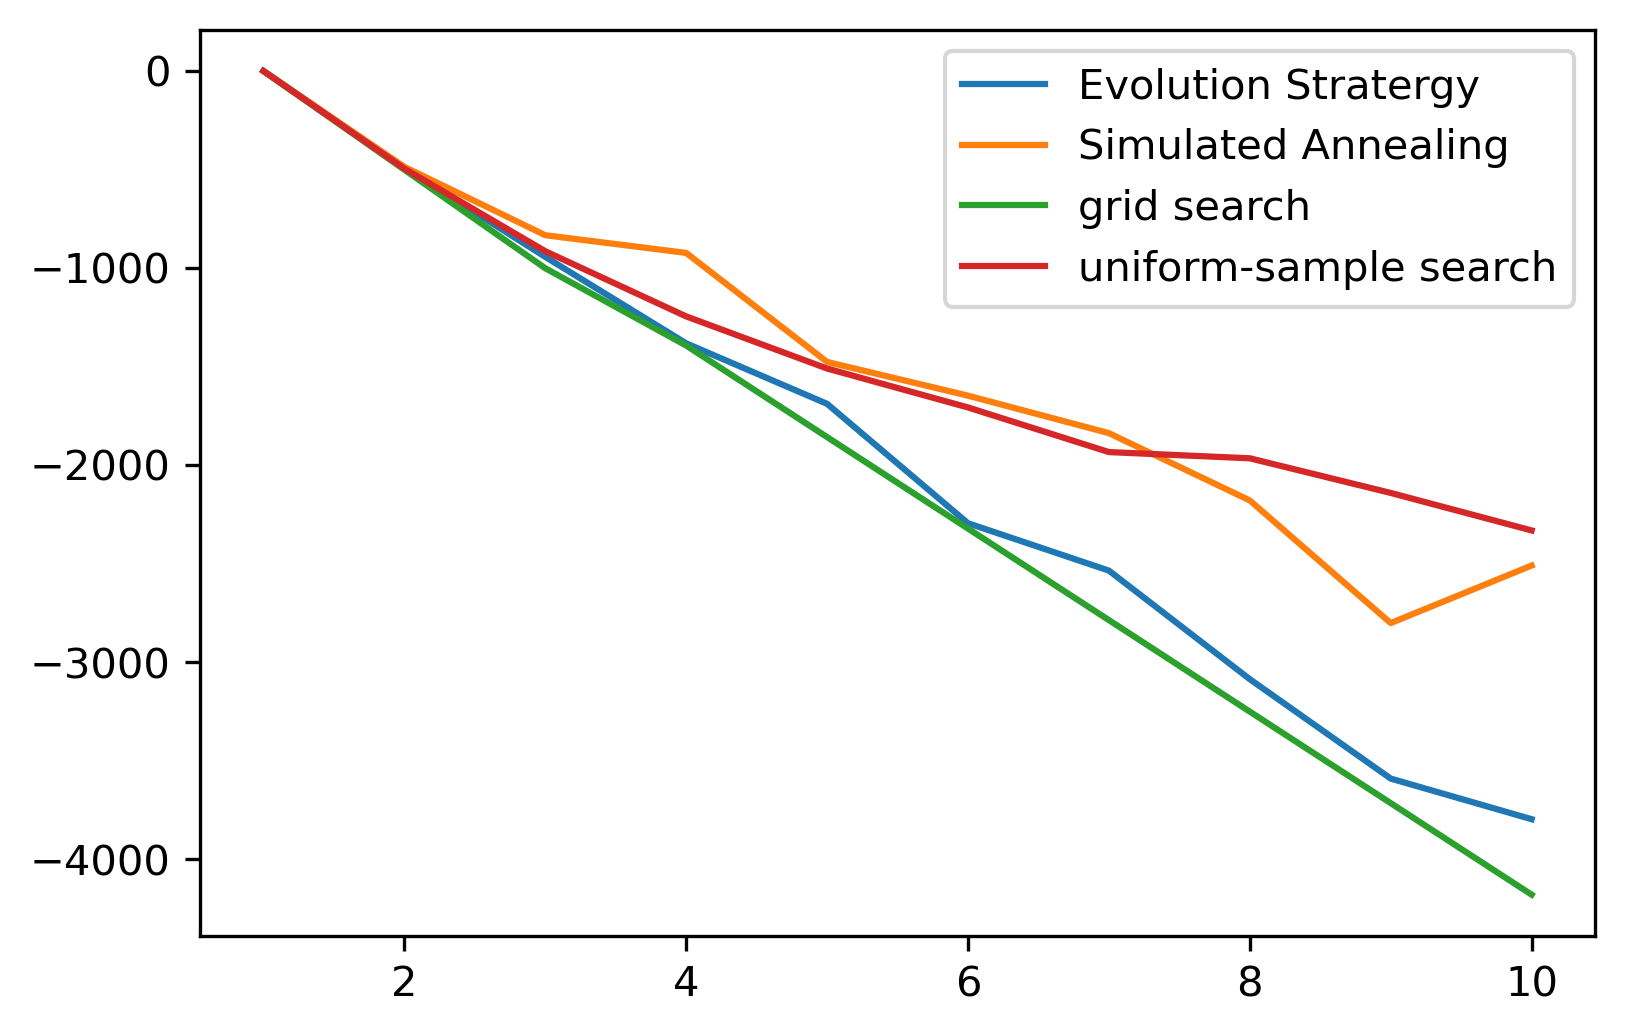

In [55]:
plt.plot(ES_results_df["x_length"], ES_results_df["mean_performance_final"], label="Evolution Stratergy")
plt.plot(SA_results_df["x_length"], SA_results_df["mean_performance_final"], label="Simulated Annealing")
plt.plot(grid_search_results[:, 0], grid_search_results[:, 1], label="grid search")
plt.plot(random_search_results[:, 0], random_search_results[:, 1], label="uniform-sample search")
plt.legend()
plt.savefig("./Figures/DIM.png")